In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('https://bit.ly/fc-ml-titanic')

## 전처리: Normalize (정규화)

column 간에 다른 **min**, **max** 값을 가지는 경우, 정규화를 통해 최소치/ 최대값의 척도를 맞추어 주는 것

* 네이버 영화평점 (0점 ~ 10점): [2, 4, 6, 8, 10]
* 넷플릭스 영화평점 (0점 ~ 5점): [1, 2, 3, 4, 5]

In [6]:
movie = {'naver': [2, 4, 6, 8, 10], 
         'netflix': [1, 2, 3, 4, 5]
         }

In [7]:
movie = pd.DataFrame(data=movie)
movie

,naver,netflix
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
min_max_scaler = MinMaxScaler()

In [10]:
min_max_movie = min_max_scaler.fit_transform(movie)

In [11]:
pd.DataFrame(min_max_movie, columns=['naver', 'netflix'])

,naver,netflix
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


## 표준화 (Standard Scaling)

**평균이 0과 표준편차가 1**이 되도록 변환


In [12]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

In [13]:
x = np.arange(10)
# outlier 추가
x[9] = 1000

In [14]:
x.mean(), x.std()

(103.6, 298.8100399919654)

In [15]:
scaled = standard_scaler.fit_transform(x.reshape(-1, 1))

In [16]:
x.mean(), x.std()

(103.6, 298.8100399919654)

In [17]:
scaled.mean(), scaled.std()

(4.4408920985006264e-17, 1.0)

In [18]:
round(scaled.mean(), 2), scaled.std()

(0.0, 1.0)

ModuleNotFoundError: ignored

# 분류모델

In [21]:
import warnings

# 불필요한 경고 출력을 방지
warnings.filterwarnings('ignore')

[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

`sklearn.dataset`에서 제공해주는 다양한 샘플 데이터를 활용

In [22]:
from sklearn.datasets import load_iris

In [23]:
# iris 데이터셋을 로드합니다.
iris = load_iris()

In [24]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [26]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [28]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [30]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df_iris['target'] = target

In [32]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

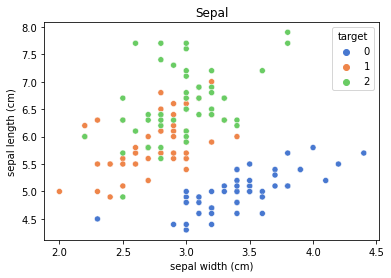

In [34]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal')
plt.show()

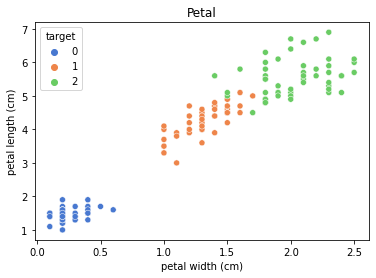

In [35]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

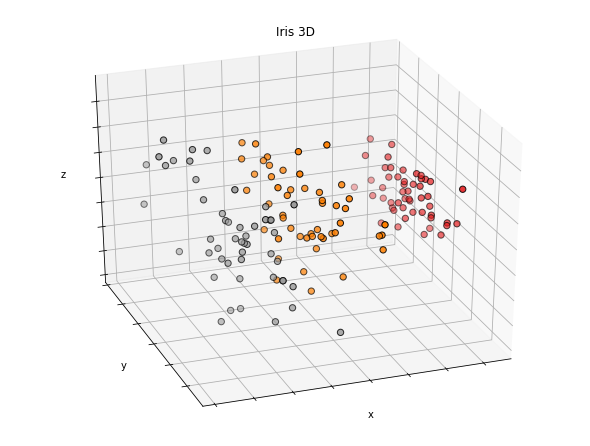

In [46]:
# 3d로 시각화 가능

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'])

In [49]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [50]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

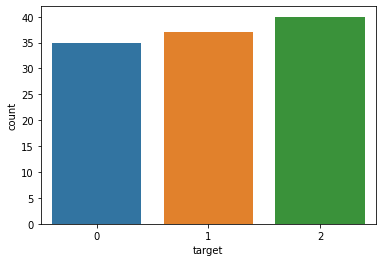

In [51]:
sns.countplot(y_train)

stratify: label의 클래스의 분포를 균등하게 배분

In [52]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

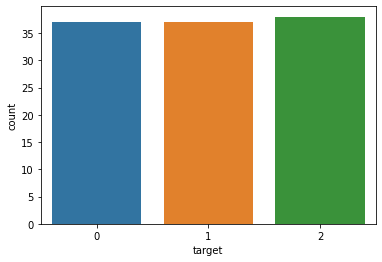

In [53]:
sns.countplot(y_train)

In [54]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [55]:
x_valid.shape, y_valid.shape

((38, 4), (38,))